In [29]:
import numpy as np
import matplotlib. pyplot as plt
import cv2

np.random. seed (42)
def euclidean_distance(x1, x2) :
    return np.sqrt(np.sum( (x1 - x2)**2))
class KMeans():
    def __init__ (self, K=5, max_iters=100, plot_steps=False) :
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        # List of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cLuster
        self. centroids = []
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        # initialize
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]
        # Optimize clusters
        for _ in range (self.max_iters):
        # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)
            if self.plot_steps:
                self.plot()
            # Calculate new centroids from the cLusters
            centroids_old = self.centroids
            self.centroids= self._get_centroids(self.clusters)
            if self._is_converged (centroids_old, self.centroids):
                break
            if self.plot_steps:
                self.plot()
            # classify samples as the index of their clusters
            return self._get_cluster_labels(self.clusters)
    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate (clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels
    def _create_clusters (self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self.closest_centroid (sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    def closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index
    def _get_centroids (self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate (clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances)== 0
    def plot (self):
        fig, ax = plt. subplots (figsize=(12, 8))
        for i, index in enumerate(self.clusters) :
            point = self.X[index].T
            ax.scatter(*point)
        for point in self.centroids:
            ax.scatter (*point, marker="x", color='black', linewidth=2)
        plt.show()
    def cent (self):
        return self.centroids

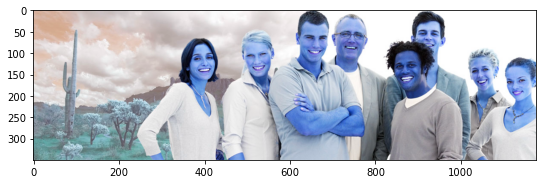

In [30]:
import cv2
#image=cv2.imread("husky.jpg")
image2=cv2.imread("photo.jpg")
plt.figure(figsize=(9,9))
#plt.imshow(image)
plt.imshow(image2)

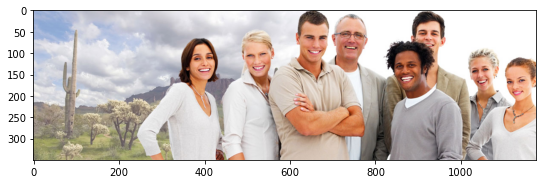

In [31]:
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(9,9))
plt.imshow(image2)

In [32]:
pixel_values=image2.reshape((-1,3))
pixel_values=np.float32(pixel_values)
k=KMeans(K=6,max_iters=10)
y_pred=k.predict(pixel_values)
k.cent()

array([[234.29490662, 185.34597778, 156.98954773],
       [165.45623779, 155.39682007, 144.5635376 ],
       [246.48799133, 246.18484497, 246.87567139],
       [212.73187256, 210.86262512, 213.85021973],
       [146.27363586, 103.64642334,  79.80135345],
       [174.73310852, 180.81721497, 197.581604  ]])

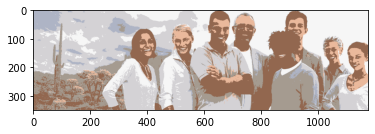

In [33]:
centers=np.uint8(k.cent())
y_pred=y_pred.astype(int)
np.unique(y_pred)
labels=y_pred.flatten()
segmented_image=centers[labels.flatten()]
segmented_image=segmented_image.reshape(image2.shape)
plt.imshow(segmented_image)
plt.show()

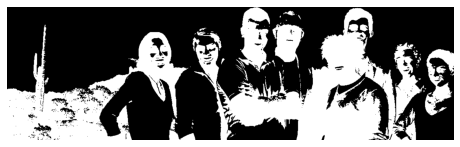

In [34]:

import warnings
warnings.filterwarnings("ignore")
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
ret, thresh1 = cv2.threshold(image2, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure(figsize=(8, 8))
plt.imshow(thresh1, cmap="binary")
plt.axis("off")
plt.show()



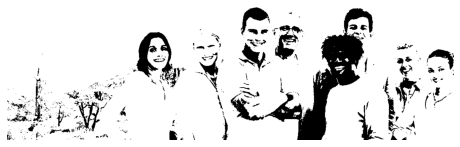

In [35]:
ret, thresh2 = cv2.threshold(image2, 120, 255, cv2.THRESH_BINARY_INV)
plt.figure(figsize=(8, 8))
plt.imshow(thresh2, cmap="binary")
plt.axis("off")
plt.show()


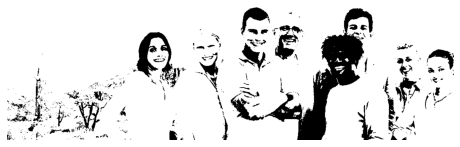

In [36]:
ret, thresh3 = cv2.threshold(image2, 120, 255, cv2.THRESH_TRUNC)
plt.figure(figsize=(8, 8))
plt.imshow(thresh2, cmap="binary")
plt.axis("off")
plt.show()

In [37]:
!pip install fuzzy-c-means